# 序言

## 说明

- 在Webpack中使用Vue与在Node.js中使用Vue没有什么不同，Vue的强项在页面设计的简化。
    - 通过局部区域的渲染，产生页面的动态变化，形成良好的用户交互，下面Vue的三个基本模块可以满足绝大部分功能；
        - Vue：基本的渲染与交互处理；
        - Vue-Router：页面的模块化；
        - Vue-Resource：AJAX请求
        
- 在利用Vue-loader加载独立的文件，实现页面渲染，Vue + Webpack就具备文件级模块开发的结构。

## 主要内容

1. Webpack搭建一个Web项目
2. 引入Vue实现一个简单的菜单功能；
    - Vue + Vue-Router
    - 样式表

# Webpack项目构建

## 项目基础结构

1. 构建项目目录
2. npm环境构建
3. 安装需要的模块
    - webpack
    - vue
    - vue-router
    - vue-resource：
    - css-loader：处理css安装依赖的file-loader
    - style-loader：处理加载的style
    - url-loader：处理图像模块，需要an
    - vue-loader：处理vue（html）模块
    - html-webpack-plugin：自动插入js脚本文件
    - extract-text-webpack-plugin：与style-loader一起自动生成`<style>`标记引入css
3. webpack配置结构
    - index.js
    - index.html
    - 配置mode/entry/output
    - 配置html-webpack-plugin
    - 配置css-loader
    - 配置extract-text-webpack-plugin
    - 配置url-loader
4. 配置npm的脚本
    - 打包脚本
    - 服务器启动脚本

- 安装脚本

```bash
    npm install webpack vue vue-router vue-resource file-loader css-loader style-loader  url-loader vue-loader html-webpack-plugin extract-text-webpack-plugin@next --save-dev
```

- 项目结构
    - webpack_vue_demo
        - conf
            - webpack.conf.js
        - dist
        - src
            - index.js
            - index.html
        - package.json

- 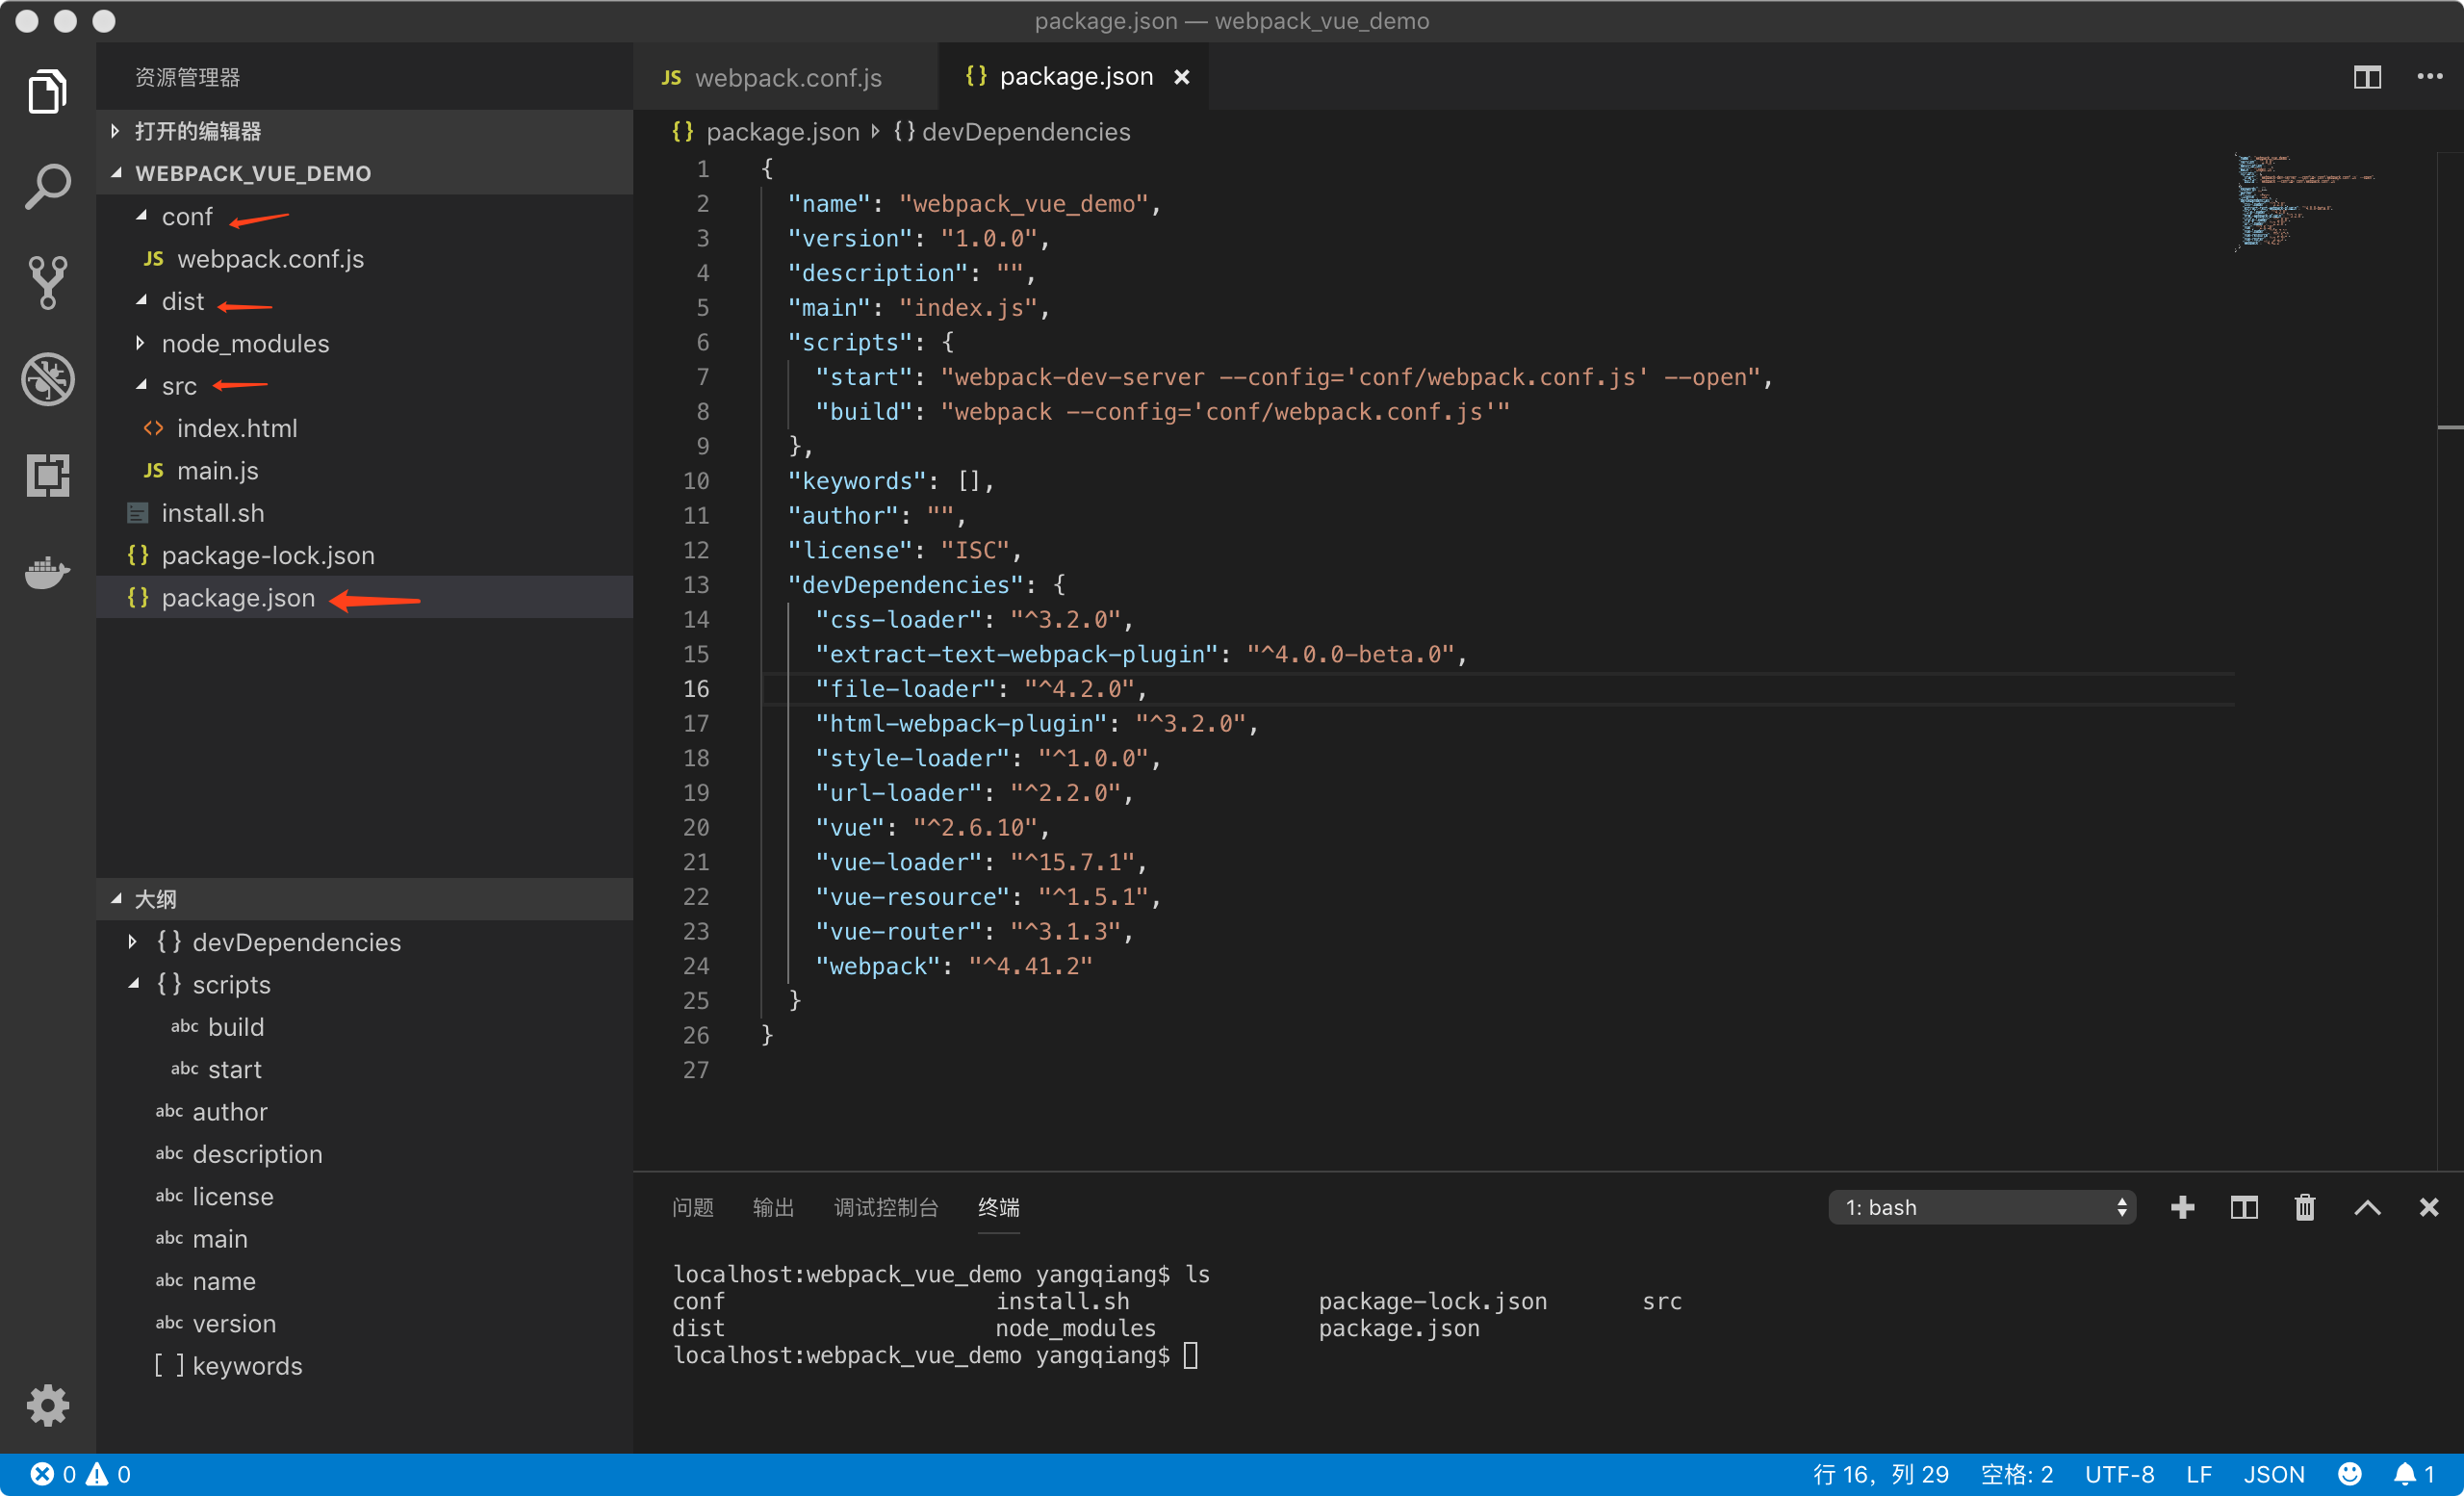

## Vue环境

1. 首页：index.html

```html
    <!DOCTYPE html>
    <html>
      <head>
        <meta charset="utf-8">
        <meta name="viewport" content="width=device-width, user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0">
        <title>Webpack + Vue</title>
      <body>
        <div id="app">组件:{{data1}}:{{data2}}</div>
      </body>
    </html>

```

2. js脚本：index.js

```javascript
    import vue from "vue/dist/vue.js";

    var vm=new vue({
        el: '#app',
        data: {
            data1: "数据1",
            data2: "数据2",
        }
    });

```

- 注意：
    - 其中vue的导入使用的是：vue/disy/vue.js模块（部署模块），否则报错提示如下：
        - 当使用runtime-only构建Vue，则模板编译器（template compiler）是不可用的（ not available），
            1. 要么使用` compiler-included `构建；
                - 采用这种方式：`import vue from "vue/dist/vue.js";`
            2. 要么把预编译（pre-compile）模板为渲染函数（render functions）；

```bash
[Vue warn]: You are using the runtime-only build of Vue where the template compiler is not available. Either pre-compile the templates into render functions, or use the compiler-included build.
```

- 注意：
    - 如果使用Vue-loader加载的vue组件，默认是runtime-only，直接使用`import vue from 'vue'`；
    - 如果使用"template: '<h1>组件</h1>'"，这是template compiler，需要使用`vue/dist/vue.js`模块库；

- `index.js`的多种方式
    - 下面render属性，我们使用了ES6中的箭头函数；可以采用传统的函数定义；

```javascript
    import vue from "vue/dist/vue.js";

    // var vm=new vue({
    //     el: "#app",
    //     data: {
    //         data1: "数据1",
    //         data2: "数据2",
    //     }
    // });


    /*

    var vm=new vue({
        data: {
            data1: "数据1",
            data2: "数据2",
        }
    }).$mount("#app");

    */
    var vm=new vue({
        el: "#app",
        data: {
            data1: "数据1",
            data2: "数据2",
        },
        render: (h) => {
            return h(
                {
                    template: "<h1>Hello!组件</h1>",
                }
            );
        },
    });

```

- 注意：
    - 使用render函数，需要注意渲染时定义的数据不可用，因为渲染时，定义的数据没有运行；渲染器无法识别；

## 配置文件

### webpack的配置文件
- `webpack.conf.js`

```javascript
    var path = require("path");
    var html_webpack_plugin = require("html-webpack-plugin");
    var html_webpack_plugin_config = {
        template: "./src/index.html",   // 模板文件（js需要插入的文件）
        filename: "index.html",   // 插入js后生成的文件
        inject: 'body',    // 打包的js插入的位置（四个插入控制方式：true|false|body|head）
        title: "这是插件修改的标题",
    };

    module.exports = {
        mode: "development",
        entry: {
            main: "./src/main.js"
        },
        output: {
            path: path.resolve(__dirname, "../dist"),
            filename: "index.js"
        },
        module: {
        },
        plugins: [
            new html_webpack_plugin(html_webpack_plugin_config),
        ],
        devServer: {
            contentBase: path.resolve(__dirname, "../dist"),
            port: 9999,
            open: true   // 自动打开浏览器，指定缺省的url
        }
    }

```

### npm的配置文件

- `package.json`

```json
    {
      "name": "webpack_vue_demo",
      "version": "1.0.0",
      "description": "",
      "main": "index.js",
      "scripts": {
        "start": "webpack-dev-server --config='conf/webpack.conf.js' --open",
        "build": "webpack --config='conf/webpack.conf.js'"
      },
      "keywords": [],
      "author": "",
      "license": "ISC",
      "devDependencies": {
        "css-loader": "^3.2.0",
        "extract-text-webpack-plugin": "^4.0.0-beta.0",
        "file-loader": "^4.2.0",
        "html-webpack-plugin": "^3.2.0",
        "style-loader": "^1.0.0",
        "url-loader": "^2.2.0",
        "vue": "^2.6.10",
        "vue-loader": "^15.7.1",
        "vue-resource": "^1.5.1",
        "vue-router": "^3.1.3",
        "webpack": "^4.41.2"
      }
    }

```

# Vue-loader的使用

- 为了上面环境配置的清晰，单独构建一个项目工程vue_loader_demo.
    - 配置过程与上面重复，这里省略

## 模块安装

- 需要安装两个模块
    - vue-loader
    - vue-template-compiler：这个编译器，可以使用使得我们直接使用`import vue from vue`。

## 模块配置

### `vue-loader`配置

```javascript
    module: {
        rules: [
            {
                test: /\.vue$/,
                loader: "vue-loader"
 
            },
        ]
    },
```

### Vue-loader插件配置

- vue-loader需要配置插件，插件在安装vue-loader的时候已经安装；只需要简单配置一下即可。

```javascript
    var VueLoaderPlugin = require('vue-loader/lib/plugin');
    ......
    plugins: [
        new html_webpack_plugin(html_webpack_plugin_config),
        new VueLoaderPlugin(),
    ],
```

## 组件开发

- 编写一个组件`App.vue`
    - 组件是有套路的，<template>是vue-router使用的标准标记；
        1. `<template>`部分；
        2. `<script>`部分；
        3. `<style>`部分；

```HTML
    <template>
        <div>
            <h1>Vue-loader的使用</h1>
            <router-view></router-view>
        </div>
    </template>

    <script>
    import vue from 'vue';
    import vue_router from 'vue-router';

    export default {
        name: 'app',
        components: {
        }
    }
    </script>
    <style>
    </style>

```

- 注意：
    - `<template>`下面只能有一个节点，这个节点称为根节点。
        - 多个节点会抛出错误。

## `main.js`的编程模式

### 模块引入

1. 模块库引入
    - `import vue_router from 'vue-router';`
    - `vue.use(vue_router);`
    
2. 引入vue文件组件
    - `import App from './App.vue';`

### 使用路由的vue环境

- 引入vue-router，在App.vue文件中的`<router-view>`才能被识别。
- vue_router的routes不是必须的，但是其中url为`\`的会默认被加载到`<router-view>`。

```javascript
    import vue from "vue/dist/vue.js";     // 因为后面使用了字符串模板
    import vue_router from 'vue-router';
    import App from './App.vue';
    vue.use(vue_router);
    const routes = [
        { 
            path: '/',                // 默认显示的根/, 自动显示首页，显示在<router-view></router-view>
            component: {
                template: "<h1>主页</h1>",
            } 
        },
        { 
            path: '/bar', 
            component: {
                template: "<h1>非主页</h1>",
            }
        }
    ];

    var router = new vue_router({
        routes: routes,   
     });

    var vm=new vue(
        {
            el: '#app',
            router,
            render: h => h(App)
        }
    );

```

### 挂载点app

```HTML

    <!DOCTYPE html>
    <html>
      <head>
        <meta charset="utf-8">
        <meta name="viewport" content="width=device-width, user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0">
        <title>Webpack + Vue</title>
      <body>
        <div id="app">组件</div>
      </body>
    </html>

```

-----